## Visualization Notebook to Accompany our Trademarks Case File analysis

In [40]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

**First** we will read in our output files and make sure they look ok

In [42]:
mark_type_counts = pd.read_csv("./output/mark_type_counts_by_year.csv")

In [43]:
serv_opp_counts = pd.read_csv("./output/serv_opposed_percents.csv")

In [44]:
trade_opp_counts = pd.read_csv("./output/trade_opposed_percents.csv")

In [45]:
mark_type_counts.head()

,filing_yr,serv_count,cert_count,trade_count
0,1899,1,0,46
1,1911,1,0,261
2,1915,1,0,278
3,1931,3,0,1023
4,1932,3,0,856


**Second** Lets plot our trademark type trends in an area plot to compare their relative prevelance over the years

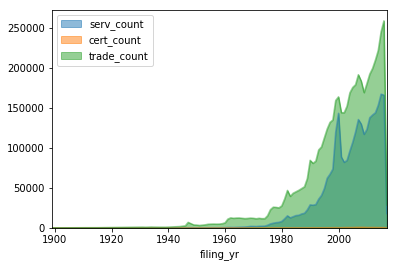

In [46]:
mtype_img = mark_type_counts.plot(kind="area", x="filing_yr", stacked=False).get_figure()

**Third** Lets move to our opposition tables for visualization

In [47]:
serv_opp_counts.head()

,event_year,opd_count,opi_count,ops_count,opt_count,pubo_count,rpr_count,percent_opi,percent_ops,percent_opt,percent_opd
0,1962,1,0,0,0,0,0,0.0,0.0,0.0,0.0
1,1964,0,0,0,1,0,0,0.0,0.0,0.0,0.0
2,1968,0,0,0,1,0,1,0.0,0.0,0.0,0.0
3,1969,0,0,0,0,0,1,0.0,0.0,0.0,0.0
4,1970,0,0,0,0,0,1,0.0,0.0,0.0,0.0


In [48]:
trade_opp_counts.head()

,event_year,opd_count,opi_count,ops_count,opt_count,pubo_count,rpr_count,percent_opi,percent_ops,percent_opt,percent_opd
0,1901,0,0,0,0,0,2,0.0,0.0,0.0,0.0
1,1903,0,0,0,0,0,1,0.0,0.0,0.0,0.0
2,1904,0,0,0,0,0,2,0.0,0.0,0.0,0.0
3,1905,0,0,0,0,0,3,0.0,0.0,0.0,0.0
4,1906,0,0,0,0,0,1,0.0,0.0,0.0,0.0


After having looked at the original data for the opposition tables we outputted, there are some years where there are more opposition than there are incoming publications for opposition, which should not be possible because you can only oppose a registration which has been published for opposition. Either this is because the data are not 100% consistent across all years (which is a possibility according to the USPTO publication on this dataset), or perhaps we made a mistep in our understanding of what is in the events table. In any event, we will filter out any percentages over 40 percent as that seemed to indicate something was off in the columns used to calculate the percentages.

In [49]:
cleaned_serv = serv_opp_counts[(serv_opp_counts['percent_opi'] < 40)&
                               (serv_opp_counts['percent_opt'] < 40)&
                               (serv_opp_counts['percent_opd'] < 40)&
                               (serv_opp_counts['percent_ops'] < 40)]

And finally let's plot the serve mark opposition percentages for any patterns

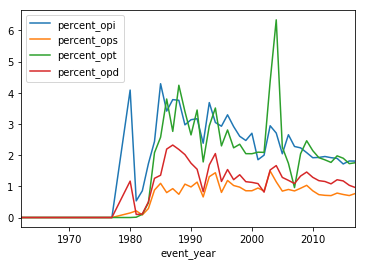

In [50]:
sm_img = cleaned_serv.plot(x="event_year", y=["percent_opi", "percent_ops", "percent_opt", "percent_opd"]).get_figure()

And we will do the same for the trademark opposition percentages table

In [51]:
cleaned_trade = trade_opp_counts[(trade_opp_counts['percent_opi'] < 40)&
                                 (trade_opp_counts['percent_opt'] < 40)&
                                 (trade_opp_counts['percent_opd'] < 40)&
                                 (trade_opp_counts['percent_ops'] < 40)]

Finally we will plot them all on the same figure to see any patterns between them.

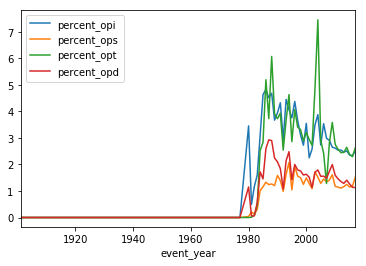

In [52]:
tm_img = cleaned_trade.plot(x="event_year", y=["percent_opi", "percent_ops", "percent_opt", "percent_opd"]).get_figure()

Finally we will save those images for use in our main analysis notebook

In [37]:
mtype_img.savefig("./imgs/mtype_area_plot.png")

In [38]:
sm_img.savefig("./imgs/serv_oppo_plot.png")

In [39]:
tm_img.savefig("./imgs/trade_oppo_plot.png")